# 0.) Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df_select = df[['trans_date_trans_time','category','amt','city_pop','is_fraud']]
df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]
dummies = pd.get_dummies(df_select['category'])
X = pd.get_dummies(df_select,['category']).drop(['trans_date_trans_time','is_fraud'],axis = 1)
y = df_select["is_fraud"]

<ipython-input-11-418559340722>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
<ipython-input-11-418559340722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
ros = RandomOverSampler(random_state = 0)
ros.fit(X_train,y_train)
over_X,over_y = ros.fit_resample(X_train,y_train)

In [ ]:
rus = RandomUnderSampler(random_state = 0)
rus.fit(X_train,y_train)
under_X,under_y = rus.fit_resample(X_train,y_train)

In [ ]:
oversample = SMOTE()
smote_X,smote_y = oversample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
over_log = LogisticRegression().fit(over_X,over_y)

In [ ]:
under_log = LogisticRegression().fit(under_X,under_y)

In [ ]:
smote_log = LogisticRegression().fit(smote_X,smote_y)

# 4.) Test the three models

In [ ]:
over_pred = over_log.predict(X_test)
under_pred = under_log.predict(X_test)
smote_pred = smote_log.predict(X_test)
print(over_pred,under_pred,smote_pred)

[0 1 0 ... 1 0 0] [0 1 0 ... 1 0 0] [0 1 0 ... 1 0 0]


# 5.) Which performed best in Out of Sample metrics?

In [ ]:
from sklearn import metrics

In [ ]:
over_matrix = metrics.confusion_matrix(y_test, over_pred)
over_matrix

array([[134585,  31454],
       [   153,    524]])

In [ ]:
over_log.score(X_test, y_test)

0.8104141174212434

In [ ]:
under_matrix = metrics.confusion_matrix(y_test, under_pred)
under_matrix

array([[134244,  31795],
       [   152,    525]])

In [ ]:
under_log.score(X_test, y_test)

0.8083747210825596

In [ ]:
smote_matrix = metrics.confusion_matrix(y_test, smote_pred)
smote_matrix

array([[135880,  30159],
       [   156,    521]])

In [ ]:
smote_log.score(X_test, y_test)

0.8181638235082416

From the above results, we can see that SMOTE performs best in the out of sample metrics since it has the largest accuracy.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [ ]:
temp1 = pd.concat([X_train, y_train], axis = 1)

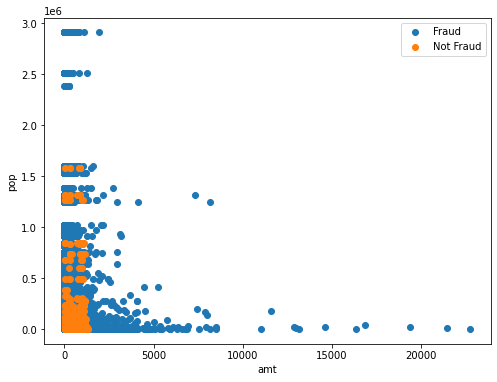

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(temp1[temp1['is_fraud'] == 0]['amt'],temp1[temp1['is_fraud']==0]['city_pop'])
plt.scatter(temp1[temp1['is_fraud'] == 1]['amt'],temp1[temp1['is_fraud']==1]['city_pop'])
plt.legend(['Fraud','Not Fraud'])
plt.xlabel('amt')
plt.ylabel('pop')
plt.show()

In [ ]:
temp2 = pd.concat([smote_X, smote_y], axis = 1)

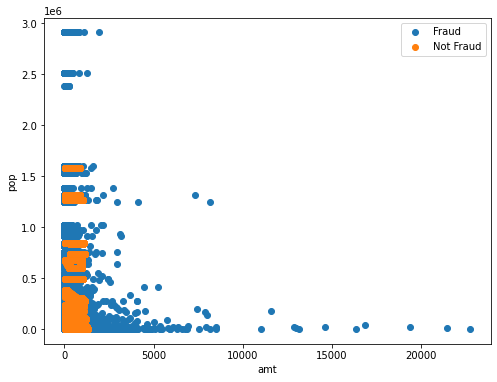

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(temp2[temp2['is_fraud'] == 0]['amt'],temp2[temp2['is_fraud']==0]['city_pop'])
plt.scatter(temp2[temp2['is_fraud'] == 1]['amt'],temp2[temp2['is_fraud']==1]['city_pop'])
plt.legend(['Fraud','Not Fraud'])
plt.xlabel('amt')
plt.ylabel('pop')
plt.show()